<a href="https://colab.research.google.com/github/sathasivamn/Support-Vector-Machine-SVM-/blob/main/Assignment_17_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM Classification - Mushroom Dataset

## Task 1: Exploratory Data Analysis (EDA)
## Task 2: Data Preprocessing
## Task 3: Data Visualization
## Task 4: SVM Implementation
## Task 5: Visualization of SVM Results
## Task 6: Parameter Tuning and Optimization
## Task 7: Comparison and Analysis
## Task 8: Summary

# Dataset Selection:

In [1]:
# 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2: Load the Mushroom Dataset
df = pd.read_csv('mushroom.csv')

print("Dataset Shape:", df.shape)
print("Columns:\n", df.columns)
df.head()

Dataset Shape: (2000, 26)
Columns:
 Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


# Task 1: Exploratory Data Analysis (EDA)

In [3]:
# Task 1: EDA – Distribution & Correlations

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


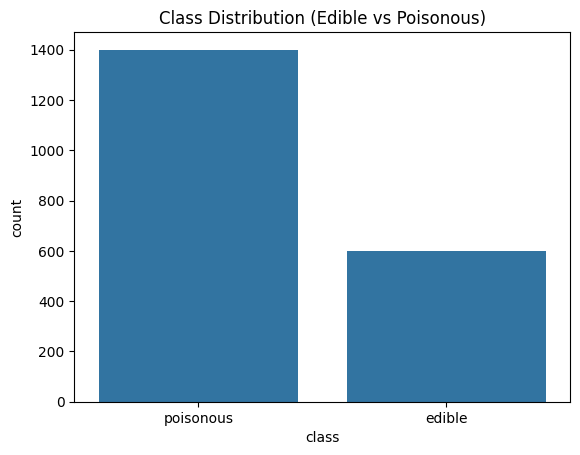

In [4]:
# Class Distribution
sns.countplot(x='class', data=df)
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()

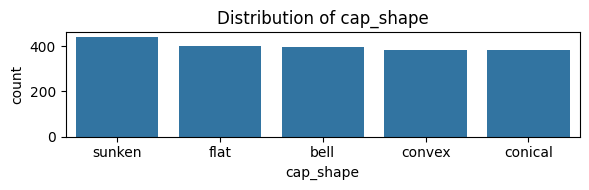

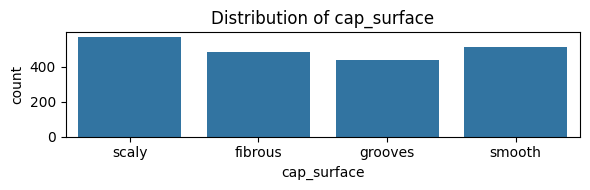

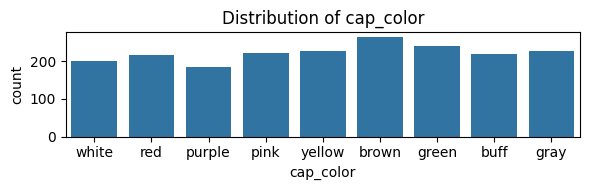

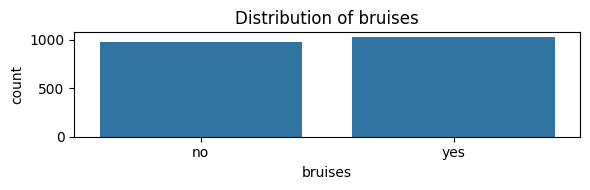

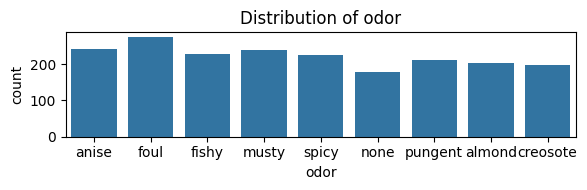

In [5]:
# Frequency plots for selected categorical features
for col in df.columns[1:6]:
    plt.figure(figsize=(6,2))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# Task 2: Data Preprocessing

In [6]:
# Task 2: Data Preprocessing

# Encode all categorical columns
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [7]:
# Split features and target
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

In [8]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Task 3: Data Visualization (Feature Relations & Class Imbalance)

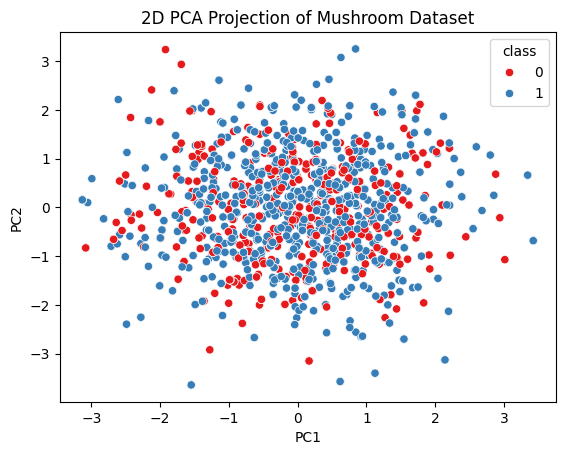

In [10]:
# Task 3: Data Visualization (Feature Relations & Class Imbalance)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['class'] = y

sns.scatterplot(x='PC1', y='PC2', hue='class', data=df_pca, palette='Set1')
plt.title("2D PCA Projection of Mushroom Dataset")
plt.show()

# Task 4: SVM Implementation

In [11]:
# Task 4: SVM Implementation

# Basic Linear SVM
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [12]:
# Evaluation
print("SVM (Linear Kernel) Performance:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

SVM (Linear Kernel) Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

Accuracy: 0.6675


# Task 5: Visualization of SVM Classification Results

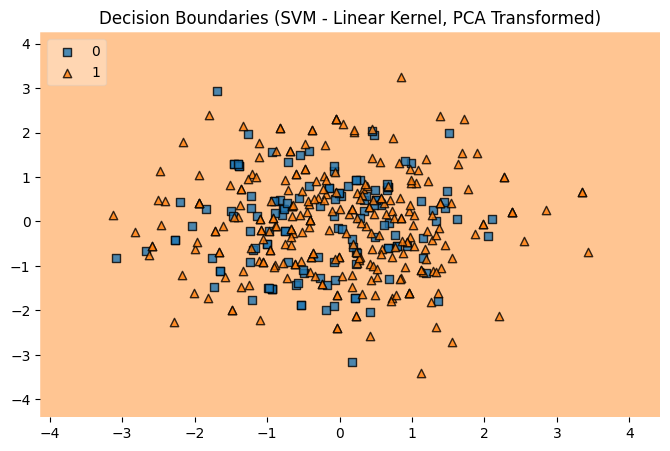

In [13]:
# Task 5: Visualization of SVM Classification Results

# Decision region plot with PCA (2D data only)
from mlxtend.plotting import plot_decision_regions

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
svc_vis = SVC(kernel='linear')
svc_vis.fit(X_train_pca, y_train_pca)

plt.figure(figsize=(8,5))
plot_decision_regions(X_test_pca, y_test_pca.values, clf=svc_vis, legend=2)
plt.title("Decision Boundaries (SVM - Linear Kernel, PCA Transformed)")
plt.show()

# Task 6: Hyperparameter Tuning

In [14]:
# Task 6: Hyperparameter Tuning

# GridSearchCV to optimize kernel and parameters
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}


In [15]:
# Evaluate optimized model
best_svm = grid.best_estimator_
y_best_pred = best_svm.predict(X_test)

print("Optimized SVM Performance:")
print(classification_report(y_test, y_best_pred))

Optimized SVM Performance:
              precision    recall  f1-score   support

           0       0.82      0.74      0.77       133
           1       0.88      0.92      0.90       267

    accuracy                           0.86       400
   macro avg       0.85      0.83      0.84       400
weighted avg       0.86      0.86      0.86       400



# Task 7: Compare Kernels

In [16]:
# Task 7: Compare Kernels

kernels = ['linear', 'rbf', 'poly']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\nSVM with {k} kernel:")
    print("Accuracy:", acc)
    print(classification_report(y_test, preds))


SVM with linear kernel:
Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400


SVM with rbf kernel:
Accuracy: 0.7875
              precision    recall  f1-score   support

           0       0.96      0.38      0.54       133
           1       0.76      0.99      0.86       267

    accuracy                           0.79       400
   macro avg       0.86      0.68      0.70       400
weighted avg       0.83      0.79      0.75       400


SVM with poly kernel:
Accuracy: 0.8275
              precision    recall  f1-score   support

           0       0.90      0.54      0.68       133
           1       0.81      0.97      0.88       267

    accuracy                           0.83       400
   macr

# Task 8: Summary:

## Strengths of SVM:
### - Great for high-dimensional categorical data (like the mushroom dataset).
### - Effective with clear margin separation.
### - Different kernels help adapt to non-linear boundaries.

## Weaknesses:
### - Slower on large datasets.
### - Sensitive to parameter tuning.
### - Requires proper feature scaling.

## Real-World Use Cases:
### - Text classification (spam filtering).
### - Bioinformatics (disease classification).
### - Image recognition and anomaly detection.

## Practical challenges:
### - SVMs are sensitive to feature scaling and not ideal for very large datasets due to training time.
### - They can struggle with overlapping classes and require kernel and parameter tuning for good performance.

## Different kernels capture different patterns:
### - Linear for linearly separable data
### - RBF for complex decision boundaries
### - Polynomial when interactions between features are non-linear but not exponential